In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [100]:
data = pd.read_csv('/content/cs-training.csv')
data.head()
data=data.iloc[:,1:]
type(data)

pandas.core.frame.DataFrame

Exploration of Data

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

Finding null values

In [102]:
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [103]:
data[data['MonthlyIncome'].isnull()][['NumberOfDependents','DebtRatio']].describe()

,NumberOfDependents,DebtRatio
count,25807.000000,29731.000000
mean,0.316310,1673.396556
std,0.809944,4248.372895
min,0.000000,0.000000
25%,0.000000,123.000000
50%,0.000000,1159.000000
75%,0.000000,2382.000000
max,9.000000,329664.000000


Dealing with missing values

In [104]:
data['DebtRatio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

Calculating the 50% of Monthly income from the data who has debt ratiop greater then 1

In [105]:
data[(data['MonthlyIncome'].notnull())&(data['DebtRatio']>1)]['MonthlyIncome'].describe()

count     7233.000000
mean      2258.955067
std       2831.168204
min          0.000000
25%          1.000000
50%       1577.000000
75%       3333.000000
max      70000.000000
Name: MonthlyIncome, dtype: float64

In [106]:
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [107]:
data.shape

(150000, 11)

Filling the null value in Monthly income with mean

In [108]:
data['MonthlyIncome'].fillna(value=1157, inplace=True)
data['NumberOfDependents'].fillna(value=0, inplace=True)

In [109]:
data.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [110]:
data.shape

(150000, 11)

Exploration of data COlumn by column

count      254.000000
mean      3381.930768
std       5051.880235
min          5.148736
25%        760.500000
50%       1899.000000
75%       3871.750000
max      50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

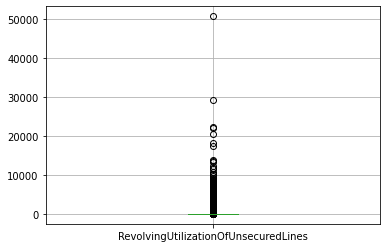

In [111]:
data.boxplot(column='RevolvingUtilizationOfUnsecuredLines')
data['RevolvingUtilizationOfUnsecuredLines'][(data['RevolvingUtilizationOfUnsecuredLines']>5)].describe()

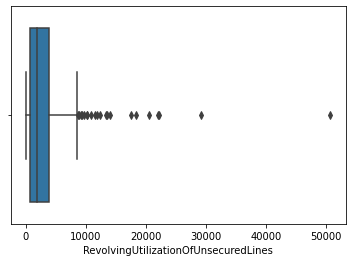

In [112]:
import seaborn as s
s.boxplot(x = data[data['RevolvingUtilizationOfUnsecuredLines']>5]['RevolvingUtilizationOfUnsecuredLines'])

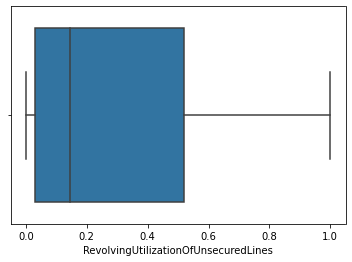

In [113]:
s.boxplot(x = data[data['RevolvingUtilizationOfUnsecuredLines']<1]['RevolvingUtilizationOfUnsecuredLines'])

Removing Data that are greater than 95% Quantile value of RevolvingUtilizationOfUnsecuredLines

In [114]:
data[data['RevolvingUtilizationOfUnsecuredLines'] >5]['RevolvingUtilizationOfUnsecuredLines'].count()/len(data) * 100

0.16933333333333334

In [115]:
data = data[data['RevolvingUtilizationOfUnsecuredLines'] <=5]
data.describe()
data.shape

(149746, 11)

AGE

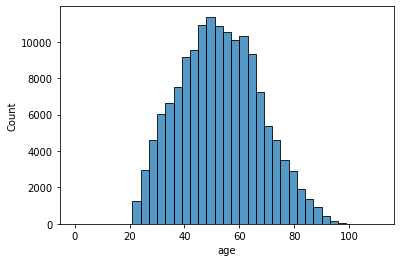

In [116]:
s.histplot(data['age'], binwidth=3)

In [117]:
data['age'].value_counts().sort_index()


0        1
21     183
22     434
23     641
24     815
      ... 
102      3
103      3
105      1
107      1
109      2
Name: age, Length: 86, dtype: int64

replacing age of 0 with median value of age

In [118]:
data['age'].replace(to_replace= 0, value=data['age'].median(), inplace=True)
data['age'].value_counts().sort_index()
data.shape

(149746, 11)

In [119]:
data["NumberOfTimes90DaysLate"].value_counts().sort_index()

0     141417
1       5238
2       1553
3        666
4        291
5        131
6         80
7         38
8         20
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

In [120]:
data["NumberOfTime60-89DaysPastDueNotWorse"].value_counts().sort_index()

0     142155
1       5721
2       1117
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [121]:
data["NumberOfTime30-59DaysPastDueNotWorse"].value_counts().sort_index()

0     125794
1      16020
2       4586
3       1750
4        746
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

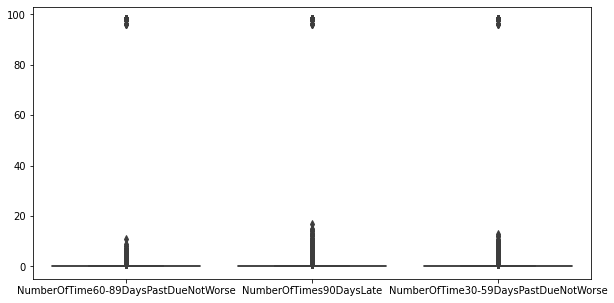

In [122]:
plt.figure(figsize=(10,5))

numberPastDue = data[['NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime30-59DaysPastDueNotWorse']]
s.boxplot(data = numberPastDue)

In [123]:
data[data['NumberOfTime30-59DaysPastDueNotWorse'] > 20].mean()

SeriousDlqin2yrs                           0.546468
RevolvingUtilizationOfUnsecuredLines       1.000000
age                                       34.245353
NumberOfTime30-59DaysPastDueNotWorse      97.962825
DebtRatio                                  5.739667
MonthlyIncome                           1927.334572
NumberOfOpenCreditLinesAndLoans            0.007435
NumberOfTimes90DaysLate                   97.962825
NumberRealEstateLoansOrLines               0.000000
NumberOfTime60-89DaysPastDueNotWorse      97.962825
NumberOfDependents                         0.327138
dtype: float64

In [124]:
pd.DataFrame({'below_1': data[data['DebtRatio'] < 1]['DebtRatio'].count()/len(data)*100,
             'beyond_10': data[data['DebtRatio'] >10]['DebtRatio'].count()/len(data)*100,
             'between_1-10': data[(data['DebtRatio'] > 1) & (data['DebtRatio'] <= 10)]['DebtRatio'].count()/len(data)*100
             }, index=[1])

,below_1,beyond_10,between_1-10
1,76.438102,19.235906,4.174402


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


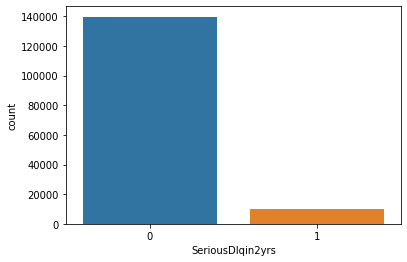

In [125]:
s.countplot(data['SeriousDlqin2yrs'])

In [126]:
data['SeriousDlqin2yrs'].value_counts().sort_index()

0    139740
1     10006
Name: SeriousDlqin2yrs, dtype: int64

In [127]:
X = data.drop('SeriousDlqin2yrs', axis=1)
y = data['SeriousDlqin2yrs']
X.shape
y.shape

(149746,)

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 8)
x_train.shape

(112309, 10)

In [129]:
from sklearn.ensemble import RandomForestClassifier

parameter = {
    'n_estimators': [9,18,27,36],
    'max_depth': [3,5,7,9],
    'min_samples_leaf': [2, 4, 6]
}

random_forest = RandomForestClassifier()

In [130]:
from sklearn.model_selection import RandomizedSearchCV

random_forest_model = RandomizedSearchCV(random_forest, param_distributions=parameter, cv=7)

In [179]:
random_forest_model.fit(x_train, y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 5, 7, 9],
                                        'min_samples_leaf': [2, 4, 6],
                                        'n_estimators': [9, 18, 27, 36]})

In [93]:
best_estimator_rf = random_forest_model.best_estimator_
best_estimator_rf

RandomForestClassifier(max_depth=9, min_samples_leaf=6, n_estimators=27)

In [94]:
y_ped_tandom_forest = random_forest_model.predict(x_test)
y_ped_tandom_forest.shape


(37437,)

In [147]:
y_ped_tandom_forest

array([0, 0, 0, ..., 0, 0, 1])

In [95]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_ped_tandom_forest)
print(con_matrix)

[[34652   252]
 [ 2153   380]]


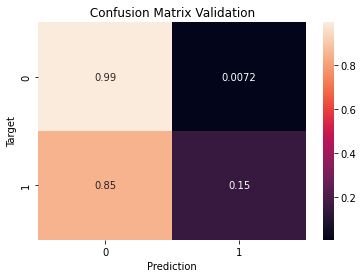

In [171]:
plt.figure()
con_matrix2 = confusion_matrix(y_test, y_ped_tandom_forest, normalize='true')
s.heatmap(con_matrix2, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title(' Confusion Matrix Validation ');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


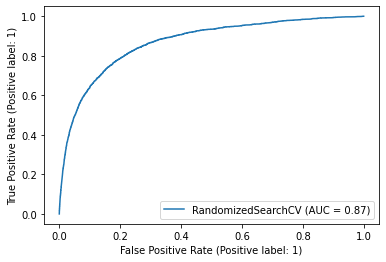

In [180]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
plot_roc_curve(random_forest_model, x_test, y_test)

In [96]:
print("training accuracy: {:.2f}".format(random_forest_model.score(x_train, y_train) * 100))
print("validation accuracy: {:.2f}".format(random_forest_model.score(x_test, y_test) * 100))

training accuracy: 94.21
validation accuracy: 93.58


In [164]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Rf_auc = roc_auc_score(y_test, y_ped_tandom_forest)
print('Random forest: ROC AUC=%.3f' % (Rf_auc))

Random forest: ROC AUC=0.571


Using XGBoost Algorithm

In [139]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
def algorithm_pipeline(x_train, x_test, y_train, y_test, 
                       model, xgb_hyperparams, cv=10):
    gs = GridSearchCV(
        estimator=model,
        param_grid=xgb_hyperparams, 
        cv=cv, 
        n_jobs=-1, 
        
        verbose=2
    )
    fitted_model = gs.fit(x_train, y_train)

    pred_XGB = fitted_model.predict(x_test)

    
    return fitted_model, pred_XGB 

In [140]:
xgb_hyperparams = {
    'max_depth' : np.arange(4,10,1),
    'colsample_bytree' : np.arange(0.5,1,0.1),
    'learning_rate' : [0.01, 0.1, 0.2, 0.3],
    'n_estimators' : np.arange(400,1000,100),
    'subsample': np.arange(0.5,1,0.1),
    'scale_pos_weight': [10,15,20]

    
}
XGB_model = xgb.XGBClassifier()

In [142]:
#XGB_model, pred_XGB = algorithm_pipeline(x_train, x_test, y_train, y_test, XGB_model, 
                                 #xgb_hyperparams, cv=2)

Fitting 2 folds for each of 10800 candidates, totalling 21600 fits


KeyboardInterrupt: ignored

In [143]:
xgb_model_new = xgb.XGBClassifier(n_jobs = -1, n_estimators = 220, random_state= 2)
xgb_model_new.fit(x_train, y_train)

XGBClassifier(n_estimators=220, n_jobs=-1, random_state=2)

In [151]:
ypred_xgb= xgb_model_new .predict(x_test)
ypred_xgb

array([0, 0, 0, ..., 0, 0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


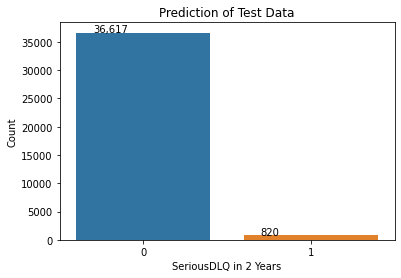

In [208]:
axis1 = s.countplot(ypred_xgb)
plt.title('Prediction of Test Data')
plt.xlabel('SeriousDLQ in 2 Years')
plt.ylabel('Count')
for p in axis1.patches:
        axis1.annotate('{:,}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [152]:
print("training accuracy with XGB model: {:.2f}".format(xgb_model_new.score(x_train, y_train) * 100))
print("validation accuracy with XGB model: {:.2f}".format(xgb_model_new.score(x_test, y_test) * 100))

training accuracy with XGB model: 93.93
validation accuracy with XGB model: 93.64


In [156]:

xgb_auc = roc_auc_score(y_test, ypred_xgb)
print('XGB: ROC AUC=%.3f' % (xgb_auc))

XGB: ROC AUC=0.591


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


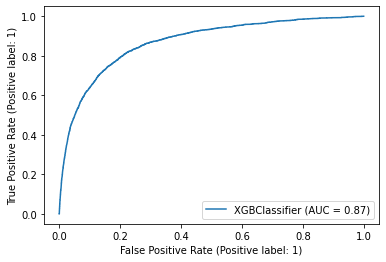

In [176]:

plot_roc_curve(xgb_model_new, x_test, y_test)

In [190]:
test_data = pd.read_csv('/content/cs-test.csv')
test_data.head()
test_data=test_data.iloc[:,1:]
type(test_data)

pandas.core.frame.DataFrame

In [191]:
test_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [193]:
test_data.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [194]:
test_data[(test_data['MonthlyIncome'].notnull())&(test_data['DebtRatio']>1)]['MonthlyIncome'].describe()

count     4729.000000
mean      2222.395010
std       2541.293874
min          0.000000
25%          1.000000
50%       1666.000000
75%       3224.000000
max      27000.000000
Name: MonthlyIncome, dtype: float64

In [195]:
test_data['MonthlyIncome'].fillna(value=1666, inplace=True)
test_data['NumberOfDependents'].fillna(value=0, inplace=True)

In [198]:
test_data.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

In [199]:
X_test_data = test_data.drop('SeriousDlqin2yrs', axis=1)
y_test_data= test_data['SeriousDlqin2yrs']
X_test_data.shape
y_test_data.shape

(101503,)

In [200]:
X_test_data.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [202]:
ypred_xgb_test_data = xgb_model_new .predict(X_test_data)
print(ypred_xgb_test_data)

[0 0 0 ... 0 0 0]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


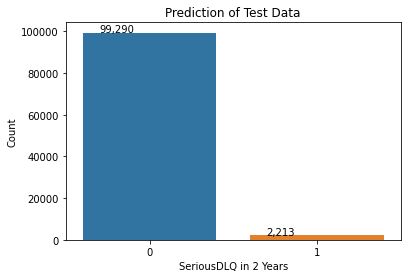

In [207]:
axis = s.countplot(ypred_xgb_test_data)
plt.title('Prediction of Test Data')
plt.xlabel('SeriousDLQ in 2 Years')
plt.ylabel('Count')
for p in axis.patches:
        axis.annotate('{:,}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))